# Multi-layer neural networks

Embora você não tenha perguntado especificamente sobre redes neurais multicamadas, deixe-me adicionar algumas frases sobre uma das arquiteturas de redes neurais multicamadas mais antigas e populares: o Multi-Layer Perceptron (MLP). O termo “Perceptron” é um pouco infeliz neste contexto, pois realmente não tem muito a ver com o algoritmo Perceptron de Rosenblatt.

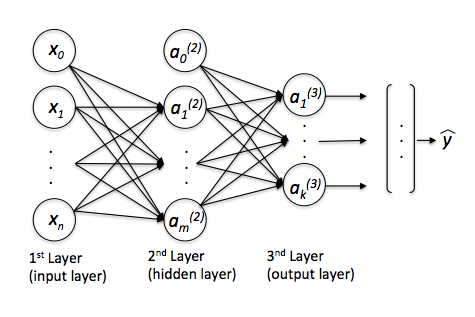

MLPs podem ser entendidos basicamente como uma rede de múltiplos neurônios artificiais em múltiplas camadas. Aqui, a função de ativação não é linear (como em Adaline), mas usamos uma função de ativação não linear como a sigmóide logística (aquela que usamos na regressão logística) ou a tangente hiperbólica, ou uma função de ativação linear por partes, como como a unidade linear retificadora (ReLU). Além disso, geralmente usamos uma função softmax (uma generalização do sigmóide logístico para problemas multiclasse) na camada de saída e uma função de limite para transformar as probabilidades previstas (pelo softmax) em rótulos de classe.

Então, qual a vantagem do MLP sobre os clássicos Perceptron e Adaline? Ao conectar os neurônios artificiais nesta rede por meio de funções de ativação não lineares, podemos criar limites de decisão complexos e não lineares que nos permitem resolver problemas em que as diferentes classes não são linearmente separáveis.

Veja exemplo...

In [1]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Perceptron
from mlxtend.classifier import Adaline
from mlxtend.classifier import MultiLayerPerceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.gridspec as gridspec
import itertools

In [2]:
gs = gridspec.GridSpec(2, 2)
X, y = make_moons(n_samples=100, random_state=123)
fig = plt.figure(figsize=(12,10))
(X, y)

(array([[ 8.71318704e-01,  4.90717552e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [ 1.46253829e+00, -3.86599306e-01],
        [-2.22520934e-01,  9.74927912e-01],
        [ 3.27699110e-01, -2.40277997e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 9.49055747e-01,  3.15108218e-01],
        [ 0.00000000e+00,  5.00000000e-01],
        [ 1.40478334e+00, -4.14412623e-01],
        [ 9.67294863e-01,  2.53654584e-01],
        [ 9.60230259e-02,  9.95379113e-01],
        [ 4.27883340e-01, -3.20172255e-01],
        [ 1.09602303e+00, -4.95379113e-01],
        [ 1.98586378e-01, -9.81105305e-02],
        [ 3.20515776e-02,  9.99486216e-01],
        [-9.00968868e-01,  4.33883739e-01],
        [ 1.15959990e+00, -4.87181783e-01],
        [-7.61445958e-01,  6.48228395e-01],
        [ 7.30832427e-02,  1.24732995e-01],
        [ 1.03205158e+00, -4.99486216e-01],
        [-6.23489802e-01,  7.81831482e-01],
        [ 1.76144596e+00, -1.48228395e-01],
        [ 3.45365054e-01,  9.384

<Figure size 864x720 with 0 Axes>

In [3]:
ppn = Perceptron(epochs=1000, eta=0.05, random_seed=0)
ppn.fit(X, y)
ada = Adaline(epochs=1000, eta=0.05, random_seed=0)
ada.fit(X, y)

mlp = MultiLayerPerceptron(n_classes=len(np.unique(y)),
                           hidden_layers=[150],
                           epochs=1000,
                           eta=0.05,
                           decrease_const=0.0,
                           minibatches=10,
                           random_seed=0
                           )

mlp = mlp.fit(X, y)

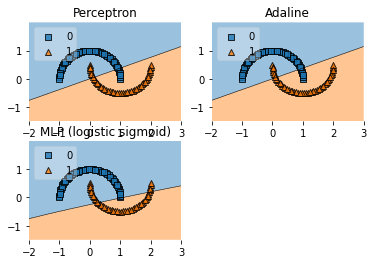

In [4]:
for clf, lab, grd in zip([ppn, ppn, mlp],
                         ['Perceptron', 'Adaline', 'MLP (logistic sigmoid)'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()